# Precio promedio por ciudad

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
df = pd.read_csv('./data/train.csv', dtype={'id':'uint32', 'provincia':'category',
                                            'tipodepropiedad':'category', 'gimnasio':'bool',
                                            'usosmultiples':'bool', 'piscina':'bool', 'escuelascercanas':'bool',
                                            'centroscomercialescercanos':'bool'})

# OJO, debe tener el archivo train.csv en la carpeta data.

In [64]:
df['antiguedad'] = df['antiguedad'].fillna(-1)
df['antiguedad'] = df['antiguedad'].astype(np.int8)
df['habitaciones'] = df['habitaciones'].fillna(-1)
df['habitaciones'] = df['habitaciones'].astype(np.int8)
df['garages'] = df['garages'].fillna(-1)
df['garages'] = df['garages'].astype(np.int8)
df['banos'] = df['banos'].fillna(-1)
df['banos'] = df['banos'].astype(np.int8)
df['idzona'] = df['idzona'].fillna(-1)
df['idzona'] = df['idzona'].astype(np.int32)
df['metroscubiertos'] = df['metroscubiertos'].fillna(-1)
df['metroscubiertos'] = df['metroscubiertos'].astype(np.int16)
df['metrostotales'] = df['metrostotales'].fillna(-1)
df['metrostotales'] = df['metrostotales'].astype(np.int16)
df['precio'] = df['precio'].astype(np.uint32)
df['fecha'] = pd.to_datetime(df['fecha'])

# OJO, los valores "-1" representan nulls.

In [65]:
dfa = df.loc[(~df['precio'].isnull()) & (~df['ciudad'].isnull())].copy()
datos = dfa.loc[:,['ciudad', 'precio']].copy()

datos.head()

,ciudad,precio
0,Benito Juárez,2273000
1,La Magdalena Contreras,3600000
2,Tonalá,1200000
3,Zinacantepec,650000
4,Zapopan,1150000


In [66]:
# Formateo los float (porque se veían feos)
pd.options.display.float_format = '{:20,.2f}'.format

In [67]:
# Filtro el df; me quedo con todas las filas, columnas 'ciudad' y 'precio'
datos_interes = datos.loc[:,['ciudad', 'precio']].copy()
datos_interes.head()

,ciudad,precio
0,Benito Juárez,2273000
1,La Magdalena Contreras,3600000
2,Tonalá,1200000
3,Zinacantepec,650000
4,Zapopan,1150000


In [68]:
#Agrupo por ciudad, calculo el promedio de los precios + agrego el contador para que en el gráfico salga contra cuantos compara
datos_interes = datos.groupby('ciudad')['precio'].agg(['mean','count']).fillna(0).reset_index()

datos_interes.head()

# OK - Salida chequeada con calculadora: Abasolo: (8500000 + 1315600 + 2500000 + 1600500 + 680000 + 1190000) / 6 = 2631016,666666667 OK

,ciudad,mean,count
0,Abalá,"315,000.00",1
1,Abasolo,"2,631,016.67",6
2,Abejones,"2,500,000.00",1
3,Acajete,"3,089,360.88",8
4,Acambay,"1,575,000.00",8


In [69]:
#Filtro por ciudades que tienen mas de 2000 artículos
datos_new = datos_interes.loc[(datos_interes['count']) > 2000].reset_index().copy()
datos_new.head()


,index,ciudad,mean,count
0,6,Acapulco de Juárez,"2,585,813.16",2454
1,37,Alvaro Obregón,"4,469,725.51",6633
2,71,Atizapán de Zaragoza,"3,242,791.20",5783
3,93,Benito Juárez,"3,384,659.49",11014
4,115,Cancún,"2,470,438.00",3779


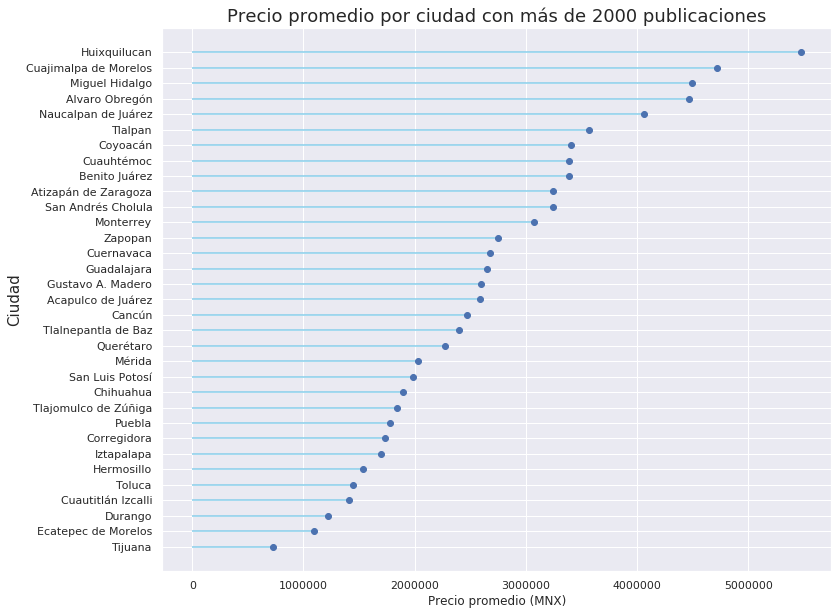

In [70]:
# Ordeno
sns.set(style="darkgrid")
ordenado = datos_new.sort_values(by='mean')
rango = range(1,len(datos_new.index)+1)
 
plt.figure(figsize=(12, 10))
plt.hlines(y=rango, xmin=0, xmax=ordenado['mean'], color='skyblue')
plt.plot(ordenado['mean'], rango, "o")
 
plt.yticks(rango, ordenado['ciudad'])
plt.title("Precio promedio por ciudad con más de 2000 publicaciones", loc='center',fontsize=18)
plt.xlabel('Precio promedio (MNX)',fontsize=12)
plt.ylabel('Ciudad',fontsize=15)
plt.savefig('Lollipop-precio-ciudad.png',bbox_inches='tight')